# Importing the libraries

In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import math
from sklearn import metrics
from sklearn.model_selection import KFold
import operator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn.utils import shuffle
import random
%matplotlib inline

# Importing the dataset

In [172]:
df = pd.read_csv(r'C:\Users\redwi\Downloads\Spring 20\CAP ML\hw5\iris.data', sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes

In [173]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [174]:
# Converting the predicted label "class" to numerical values
df['class'] = pd.Categorical(df['class'])
df['class'] = df['class'].cat.codes

In [175]:
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
95,5.7,2.9,4.2,1.3,1
96,6.2,2.9,4.3,1.3,1
97,5.1,2.5,3.0,1.1,1
98,5.7,2.8,4.1,1.3,1


In [176]:
train_df,test_df=train_test_split(df)

In [177]:
train_df.to_csv("train_df.csv",index=None)
test_df.to_csv("test_df.csv",index=None)

# Dataset Loading

In [178]:
train_df = pd.read_csv("train_df.csv")

In [179]:
x_train= train_df.iloc[:,:-1].values
y_train= train_df.iloc[:,-1].values

# Question 2

# KNN MODEL

In [180]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(x_train, y_train)

In [181]:
knn_model_file = 'knn_model.txt'
joblib.dump(knn_model, knn_model_file)

['knn_model.txt']

In [182]:
loaded_model = joblib.load(r'C:\Users\redwi\Machine Learning\knn_model.txt')

# Test dataset loading

In [183]:
train_df = pd.read_csv("test_df.csv")
x_test= test_df.iloc[:,:-1].values
y_test= test_df.iloc[:,-1].values

# KNN Test Set Accuracy Check

In [184]:
y_pred = loaded_model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

# # Decision Tree Model

In [185]:
clf = DecisionTreeClassifier(random_state=0)

In [186]:
train_df = pd.read_csv("test_df.csv")
x_test= test_df.iloc[:,:-1].values
y_test= test_df.iloc[:,-1].values

In [187]:
tree_model=clf.fit(x_train, y_train)

In [188]:
tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [189]:
tree_model_file = 'tree_model.txt'
joblib.dump(tree_model, tree_model_file)

['tree_model.txt']

In [190]:
load_model = joblib.load(r'C:\Users\redwi\Machine Learning\tree_model.txt')

In [191]:
y_pred = load_model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9473684210526315

# 5 fold cross validation

In [192]:
cv = model_selection.KFold(n_splits=5)

In [193]:
X = df[df.columns[:-1]].values
y = df['class'].values

In [194]:
X, y = shuffle(X, y, random_state = 999)

In [195]:
for i, j in cv.split(df):
    train_X, test_X = X[i], X[j]
    train_Y, test_Y = y[i], y[j]
    print(test_Y)

[0 1 0 0 2 1 1 0 0 1 1 0 2 2 2 1 1 0 2 0 0 2 2 0 2 0 2 2 1 2]
[1 2 0 2 0 1 0 2 1 2 1 0 1 2 2 0 1 0 0 1 2 0 2 0 0 0 2 2 1 1]
[0 0 1 1 2 1 0 1 1 0 1 2 2 1 1 2 1 0 0 2 0 2 2 0 1 1 1 1 0 0]
[0 0 1 2 0 0 1 2 1 2 2 0 2 0 1 1 2 0 2 1 1 1 2 0 1 1 1 2 0 2]
[1 0 2 0 2 2 1 1 2 0 2 0 0 2 2 2 1 1 1 2 0 1 1 2 0 2 0 2 1]


In [196]:
max_Neighbors = 25 # I would like to check the number of neighbors in k-NN from 1 to 25
kNN_accuracies = [[] for i in range(max_Neighbors)]
dt_accuracies = []

# Running 5 times for 5-fold cross validation
for i, j in cv.split(df):
    train_X, test_X = X[i], X[j]
    train_Y, test_Y = y[i], y[j]
    
    # Decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_Y)
    pred_Y = clf.predict(test_X)
    dt_accuracies.append(metrics.accuracy_score(pred_Y, test_Y))
    
    
    # k-NN classifier with 1 to 25 neighbour
    accurarics = []
    for k in range(0,max_Neighbors):
        knn = neighbors.KNeighborsClassifier(n_neighbors = k+1)
        knn.fit(train_X, train_Y)
        pred_Y = knn.predict(test_X)
        kNN_accuracies[k].append(metrics.accuracy_score(pred_Y, test_Y))
    kNN_accuracies.append(accurarics)

In [197]:
np.mean(dt_accuracies)

0.9326436781609196

# Best K

In [198]:
mean_kNN_accuracies = []
for i in range(0,25):
    mean_kNN_accuracies.append(np.mean(kNN_accuracies[i]))

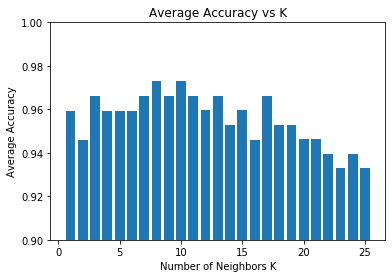

In [199]:
# Plotting histogram for different neibors to get the neighbors number for maximum accuracy from k-NN
plt.bar([y+1 for y in range(max_Neighbors)], mean_kNN_accuracies)
plt.ylim([0.9,1])
plt.xlabel("Number of Neighbors K")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy vs K")
plt.show()

# KNN VS DECISION TREE

In [200]:
mean_kNN_accuracies[7]

0.9728735632183909

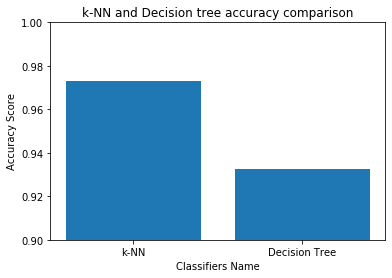

In [201]:
# Histogram to compare the average accuracy of k-NN and Decision tree
objects = ('k-NN', 'Decision Tree')
y_pos = np.arange(len(objects))
plt.bar(np.arange(2), [mean_kNN_accuracies[7], np.mean(dt_accuracies)])
plt.ylim([0.9,1])
plt.title("k-NN and Decision tree accuracy comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Classifiers Name")
plt.xticks(y_pos, objects)
plt.show()
# print("Accuracy of KNN: {}".format(mean_accs_knn[np.argmax(mean_accs_knn)]))
# print("Accuracy of Decision Tree: {}".format(mean_accs_dt))